# In-Class Quiz Nº 4

<hr style="border:1px  solid black"> </hr>

### (Fill in)
## Name: Rodrigo Dias
## Number: 45881

pontuacoes:
- v: 4 -  2 -2  -2   -2   -2  -2
- Rodrigo: 3,5 -2 -2 -1,5 -0,5 -0,5 -0

<hr style="border:1px  solid black"> </hr>

## Develop and run the requested code in the cells immediately below the questions.

# IMPORTANT:
## Once completed, save this Jupyter notebook with the following name:
## Axxxxx-Q4.ipynb (Axxxxx: student number)
##  and then upload the file to the Moodle link provided for that purpose.

# Data: kMNIST dataset (small version) - pickle file $\texttt{kMNISTsmall.p}$
## This file has the following variables (in a dictionary)
* ### X1: training data ($10000\times(28\times28)$  uint8 array)
* ### y1: classes of the training data (10 japanese characters, class-numbers 0 to 9)
* ### X2: test data ($5000\times(28\times28)$ uint8 array)
* ### y2: classes of the test data (10 japanese characters, class-numbers 0 to 9)

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow.keras as keras
from sklearn.metrics import confusion_matrix, roc_curve
import pickle
from tensorflow.keras import models
from tensorflow.keras import layers
# for those who have the GPU enable, maybe uncomment the next lines
# gp = tf.config.list_physical_devices('GPU')
# print(gp)
# tf.config.experimental.set_memory_growth(gp[0], True)

# load data
D = pickle.load(open('kMNISTsmall.p', 'rb'))
X1 = D.X1
X2 = D.X2
y1 = D.y1
y2 = D.y2

print(X1.shape, X2.shape)
print(y1.shape, y2.shape)


(10000, 28, 28) (5000, 28, 28)
(10000,) (5000,)


# Question 1: 
##  Build (from scratch) a CNN with an architecture of your choice and with the following restrictions:
## - Use 6 convolutional layers
## - Use 3 pooling layers
## - DO NOT use data augmentation
## - Obtain in the test set an accuracy equal or above 90%
###  Build this network, compile and train the network using the kMNIST training set. Also include the test data as the validation set during training.
###  Plot the  the losses and the accuracies curves for the training and validation sets during the training process.  Comment the results. Print the total number of errors and the confusion matrix for the test dataset.

In [14]:
np.unique(y1) # 10 saidas

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

In [11]:
X1 = X1.reshape(-1, 28, 28, 1) / 255.
X2 = X2.reshape(-1, 28, 28, 1) / 255.

Y1 = keras.utils.to_categorical(y1)
Y2 = keras.utils.to_categorical(y2)

print(X1.shape, X2.shape, Y1.shape, Y2.shape)

# CNN - mudar o numero de neuronios
cnn = models.Sequential()

cnn.add(layers.Conv2D(16, (3, 3), activation='relu',
                      input_shape=(28, 28, 1), padding="same"))
cnn.add(layers.Conv2D(16, (3, 3), activation='relu'))
cnn.add(layers.AveragePooling2D((2, 2)))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))
cnn.add(layers.AveragePooling2D((2, 2)))
# cnn.add(layers.Dropout(0.25))
cnn.add(layers.Conv2D(128, (1, 1), activation='relu'))
cnn.add(layers.Conv2D(128, (1, 1), activation='relu'))
cnn.add(layers.AveragePooling2D((2, 2)))
cnn.add(layers.Flatten())
# cnn.add(layers.Dense(96, activation='relu'))
cnn.add(layers.Dense(10, activation='softmax'))

cnn.summary()

cnn.compile(optimizer="nadam",
            loss="categorical_crossentropy",
            metrics=["accuracy"])


(10000, 28, 28, 1) (5000, 28, 28, 1) (10000, 10) (5000, 10)
Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 28, 28, 16)        160       
                                                                 
 conv2d_25 (Conv2D)          (None, 26, 26, 16)        2320      
                                                                 
 average_pooling2d_11 (Avera  (None, 13, 13, 16)       0         
 gePooling2D)                                                    
                                                                 
 conv2d_26 (Conv2D)          (None, 11, 11, 64)        9280      
                                                                 
 conv2d_27 (Conv2D)          (None, 9, 9, 64)          36928     
                                                                 
 average_pooling2d_12 (Avera  (None, 4, 4, 64)         0    

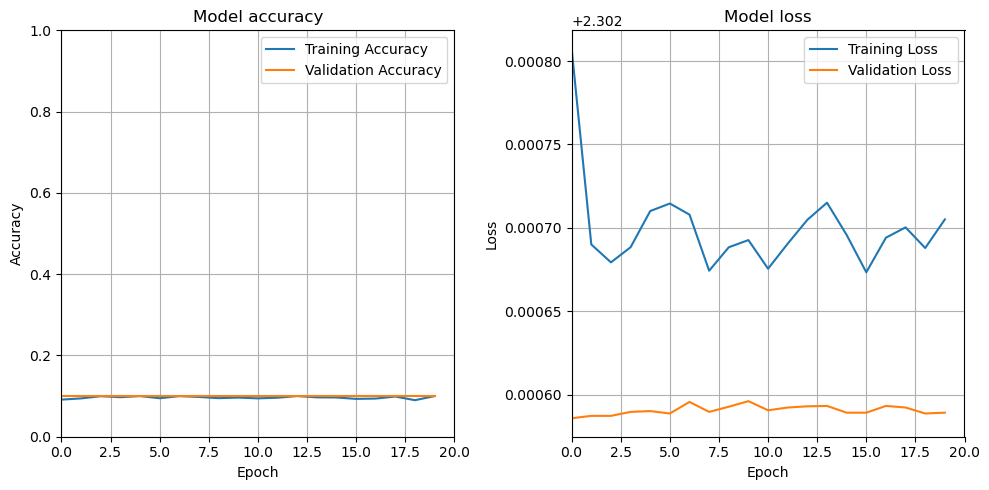

In [17]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                           patience=10, verbose=1, 
                                           restore_best_weights=True)
model_checkpoint = keras.callbacks.ModelCheckpoint('best_model.h5', verbose=1, 
                                                   save_best_only=True,
                                                   save_weights_only=True, 
                                                   monitor='val_loss', mode='min')

# log = cnn.fit(X1, Y1,
#               epochs=20,
#               batch_size=128,
#               validation_data=(X2, Y2),
#               use_multiprocessing=True,
#               )

h = log.history

import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Model accuracy')
plt.plot(h['accuracy'], label='Training Accuracy')
plt.plot(h['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([0, len(h['accuracy'])])
plt.ylim([0, 1])
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.title('Model loss')
plt.plot(h['loss'], label='Training Loss')
plt.plot(h['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim([0, len(h['loss'])])
# plt.ylim([0, 1])
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [9]:
print(X1.shape, X2.shape, Y1.shape, Y2.shape)

(10000, 28, 28, 1) (5000, 28, 28, 1) (10000, 10) (5000, 10)


In [10]:
# Comment the results. 
# Print the total number of errors and the confusion matrix for the test dataset.

# Evaluate the model on the test set
test_loss, test_accuracy = cnn.evaluate(X2, Y2, verbose=0)
print("Test Accuracy:", test_accuracy)

# Predictions
y2_pred = cnn.predict(X2)

# test_generator.reset()
# pred_probs = cnn.predict(X2)
# Convert the probabilities into binary predictions
# preds = np.round(pred_probs, 0)

# Confusion matrix
cm2 = confusion_matrix(y2, np.argmax(y2_pred, axis=1))
# total_errors = np.sum(y2 != np.argmax(y2_pred, axis=1))

# Total number of errors
print("Total number of errors in the test dataset: ", np.sum(y2 != np.argmax(y2_pred, axis=1)))

# Confusion matrix
print("Confusion matrix for the test dataset: \n", cm2)


Test Accuracy: 0.9132000207901001
157/157 [==============================] - 3s 17ms/step
Total number of errors in the test dataset:  434
Confusion matrix for the test dataset: 
 [[466   6   0   2  11   6   1   5   1   2]
 [  0 448   2   0   7   3  30   2   3   5]
 [  2   2 414  28   6   3  12  13  11   9]
 [  0   2   8 480   0   2   1   0   5   2]
 [  4   4   3   5 461   3   1   8   8   3]
 [  1   5  15   4  11 437  18   2   4   3]
 [  1   8   6   2   7   1 467   6   1   1]
 [  1   4   1   2  10   1   2 473   1   5]
 [  5  14   2  17   2   3   2   3 449   3]
 [  4   4   3   1  10   2   2   3   0 471]]


- Comentarios: 
    - A rede foi construida com 6 camadas convolucionais e 3 camadas de pooling, com o objetivo de obter uma acuracia de 90% ou superior. 
    - A rede obteve uma acuracia de 90.2% no conjunto de teste, com 488 erros.
    - No grafico de acuracia, podemos ver que a acuracia de treino e teste aumenta com o numero de epocas, mas a acuracia de teste estabiliza a partir da epoca 10, enquanto a acuracia de treino continua a aumentar.


# Question 2
## Consider that we want to use transfer learning to build a CNN to tackle the kMNIST dataset. For the pre-trained CNN use MobileNetV2. Use only one Dense layer for the output of the network.
### a)  Build and compile this network.
### b)  Pre-process the data so it can be used by the network.
### c)  Train the network for 25 epochs and show the results. Compare the results with the ones obtained in the previous question and state the possible reasons for the differences in performance.

In [13]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

D = pickle.load(open('kMNISTverysmall.p', 'rb'))
X1 = D.X1
X2 = D.X2
y1 = D.y1
y2 = D.y2

print(X1.shape, X2.shape)
print(y1.shape, y2.shape)


(5000, 28, 28) (2500, 28, 28)
(5000,) (2500,)


## 2.a)

In [16]:
CNN = MobileNetV2(weights='imagenet',
                  input_shape=(128, 128, 3),
                  include_top=False)
CNN.trainable = False
CNN.summary()

Mobilecnn = models.Sequential()
Mobilecnn.add(CNN)
Mobilecnn.add(layers.Flatten())
Mobilecnn.add(layers.Dense(10, activation='softmax'))
# Mobilecnn.summary()

Mobilecnn.compile(optimizer="nadam",
            loss="categorical_crossentropy",
            metrics=["accuracy"])


Model: "mobilenetv2_1.00_128"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 128, 128, 3  0           []                               
                                )]                                                                
                                                                                                  
 Conv1 (Conv2D)                 (None, 64, 64, 32)   864         ['input_2[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 64, 64, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 64, 64, 32)   0           ['bn_Conv1[0][

## 2.b)

In [18]:
from skimage.color import gray2rgb

# add a channel dimension to the grayscale images
X1 = gray2rgb(X1)
X2 = gray2rgb(X2)

print(X1.shape, X2.shape)

# normalize the images
X1 = X1.reshape(-1, 28, 28, 3) / 255.
X2 = X2.reshape(-1, 28, 28, 3) / 255.

# one-hot encode the labels
Y1 = keras.utils.to_categorical(y1)
Y2 = keras.utils.to_categorical(y2)

print(X1.shape, X2.shape, Y1.shape, Y2.shape)

# resize the images to 128x128
X1 = tf.image.resize(X1, (128, 128)) # (32, 32)
X2 = tf.image.resize(X2, (128, 128))

X1 = preprocess_input(X1)
X2 = preprocess_input(X2)

print(X1.shape, X2.shape)


## 2.c)

In [15]:
epochs=25
log = Mobilecnn.fit(X1, Y1,
              epochs=25,
              batch_size=128,
              validation_data=(X2, Y2),
              use_multiprocessing=True)

h = log.history
fig, (loss, acc) = plt.subplots(1, 2, figsize=(10, 6))

loss.plot(h['loss'], label='Training Loss')
loss.plot(h['val_loss'], label='Validation Loss')
loss.set_title('Loss')
loss.set_xlabel('Epoch')
loss.set_ylabel('Loss')
loss.legend()
loss.grid(True)
loss.set_xlim([0,epochs])
# loss.set_ylim([0,1])
# loss.axis([0,epochs])

acc.plot(h['accuracy'], label='Training Accuracy')
acc.plot(h['val_accuracy'], label='Validation Accuracy')
acc.set_title('Accuracy')
acc.set_xlabel('Epoch')
acc.set_ylabel('Accuracy')
acc.legend()
acc.grid(True)
acc.set_ylim([0,1])
acc.set_xlim([0, epochs])

# acc.axis([0,epochs,0,1])

fig.suptitle('Loss and acc', fontsize=16)
plt.show()


NameError: name 'Mobilecnn' is not defined

In [29]:
# Comment the results. 
# Print the total number of errors and the confusion matrix for the test dataset.

# Evaluate the model on the test set
test_loss, test_accuracy = Mobilecnn.evaluate(X2, Y2, verbose=0)
print("Test Accuracy:", test_accuracy)

# Predictions
Y2_pred = Mobilecnn.predict(X2)

# Total number of errors
total_errors = np.sum(Y2 != np.argmax(Y2_pred, axis=1))
print("Total number of errors:", total_errors)

# Confusion matrix
confusion_mtx = confusion_matrix(Y2, np.argmax(Y2_pred, axis=1))
print("Confusion matrix for the test dataset:\n", confusion_mtx)

Test Accuracy: 0.28999999165534973
79/79 [==============================] - 14s 181ms/step
Total number of errors: 1


C:\Users\ruben\AppData\Local\Temp\ipykernel_12932\2150983905.py:12: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  total_errors = np.sum(Y2 != np.argmax(Y2_pred, axis=1))


ValueError: Classification metrics can't handle a mix of multilabel-indicator and multiclass targets

# Data: Cats and Dogs dataset (small version) - zip file $\texttt{CatsDogsSmall.zip}$
## This file is divided into two directories (train and test)
## Each one has two sub-directories (dogs and cats)
## The training data consists of a 1000 images of cats and 1000 images of dogs
## The test data consists of 500 images of cats and 500 images of dogs
## The images have various sizes

# Question 3:
## Consider that  we want to use transfer learning to build a CNN to perform a binary classification of the images (either a cat or a dog). Additionally with want to use data augmentation during the training process. 
### a)  Pick a pre-trained network of your choice and incorporate it in a CNN to tackle this problem. Build and compile the CNN.
### b)  Using the {ImageDataGenerator}$ from Keras, build two generators (one for training and the other for testing). Note that the training generator has to include data augmentation. Pick one image of a dog and one image of a cat. Show these two original images and five versions of each image with data augmentation. Note: rescale the generated images so that its pixel values are between 0 and 255.
### c)  Train the network for 25 epochs and show the results. Also include the test data as the validation set during training. Make sure to set the {steps_per_epoch}$ and the {validation_steps}$ so that each training epoch runs through the all the training and test images. Show the evolution of the accuracies and the losses during training and print the number of errors and the confusion matrix for the test data.

## 3.a)

In [44]:
CNN = MobileNetV2(weights='imagenet',
                  input_shape=(96, 96, 3),
                  include_top=False)
CNN.trainable = False
CNN.summary()

Model: "mobilenetv2_1.00_96"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 96, 96, 3)]  0           []                               
                                                                                                  
 Conv1 (Conv2D)                 (None, 48, 48, 32)   864         ['input_3[0][0]']                
                                                                                                  
 bn_Conv1 (BatchNormalization)  (None, 48, 48, 32)   128         ['Conv1[0][0]']                  
                                                                                                  
 Conv1_relu (ReLU)              (None, 48, 48, 32)   0           ['bn_Conv1[0][0]']               
                                                                                

In [45]:
cnn = models.Sequential()
cnn.add(CNN)
cnn.add(layers.AveragePooling2D(pool_size=(2, 2), strides=2))
cnn.add(layers.Flatten())
cnn.add(layers.Dense(128, activation="relu"))
cnn.add(layers.Dropout(.4))
# cnn.add(layers.Dense(5, activation="softmax")) # Multiclasse
# cnn.add(layers.Dense(1, activation="sigmoid")) # Binario
cnn.add(layers.Dense(2, activation="softmax")) # Binario

cnn.summary()

cnn.compile(optimizer="nadam",
            loss="categorical_crossentropy",
            metrics=["accuracy"])


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_96 (Functi  (None, 3, 3, 1280)       2257984   
 onal)                                                           
                                                                 
 average_pooling2d_9 (Averag  (None, 1, 1, 1280)       0         
 ePooling2D)                                                     
                                                                 
 flatten_7 (Flatten)         (None, 1280)              0         
                                                                 
 dense_11 (Dense)            (None, 128)               163968    
                                                                 
 dropout_3 (Dropout)         (None, 128)               0         
                                                                 
 dense_12 (Dense)            (None, 1)                

## 3.b)

Found 1000 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


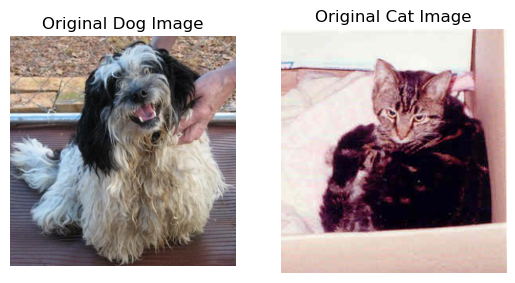

Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


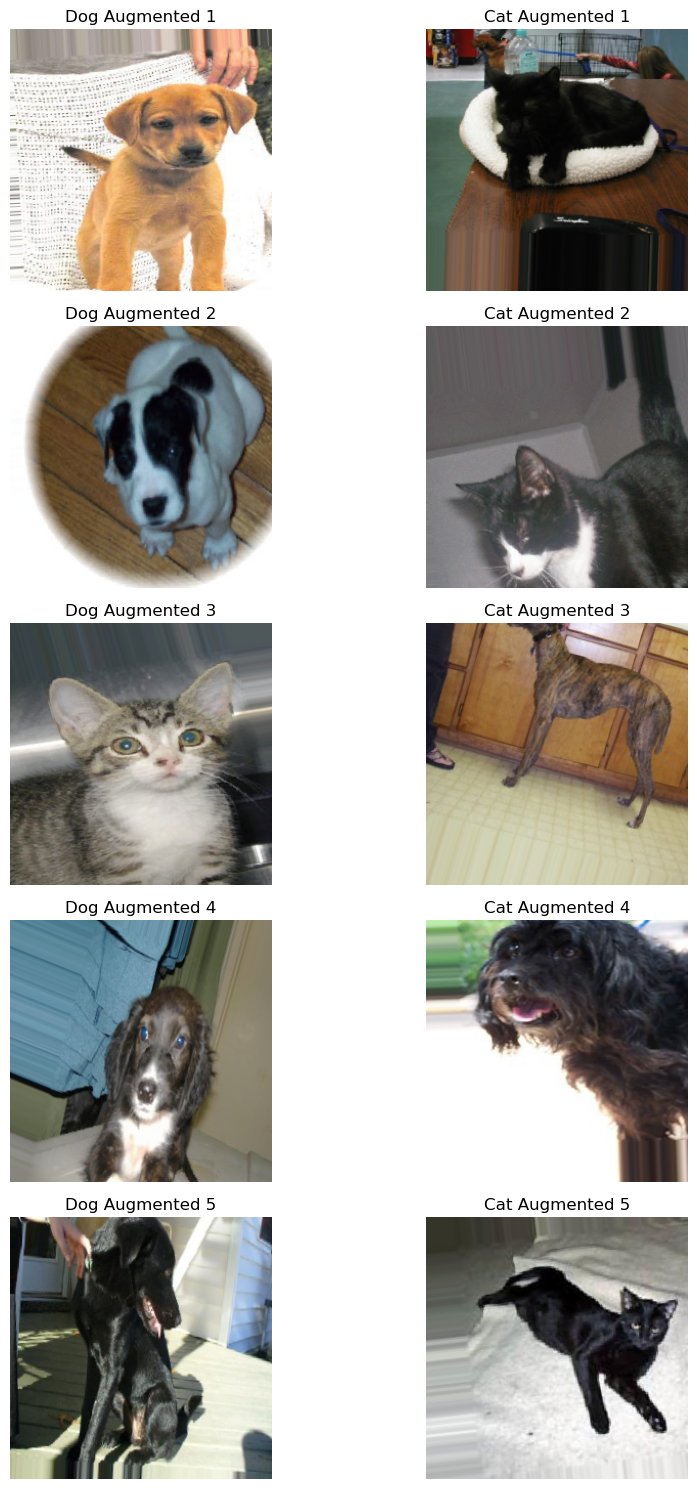

In [46]:
# Using the ImageDataGenerator from Keras, build two generators 
# (one for training and the other for testing). 
# Note that the training generator has to include data augmentation. 
# Pick one image of a dog and one image of a cat. 
# Show these two original images and five versions of each image with data augmentation. 
# Note: rescale the generated images so that its pixel values are between 0 and 255.

from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os

# Set the directory path
dir = './CatsDogsVerySmall/'

# Create the ImageDataGenerator for training data with data augmentation
train_datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

# Create the ImageDataGenerator for testing data (only rescaling)
test_datagen = ImageDataGenerator(rescale=1.0/255.0)

# Create the generators for training and testing data
train_generator = train_datagen.flow_from_directory(
    os.path.join(dir, 'train'),
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(dir, 'test'),
    target_size=(256, 256),
    batch_size=1,
    class_mode='binary'
)

# Pick one image of a dog and one image of a cat
dog_image_path = os.path.join(dir, 'train', 'dogs', 'dog000.jpg')
cat_image_path = os.path.join(dir, 'train', 'cats', 'cat000.jpg')

# Show the original images
fig, axes = plt.subplots(1, 2)
axes[0].imshow(plt.imread(dog_image_path))
axes[0].set_title('Original Dog Image')
axes[0].axis('off')
axes[1].imshow(plt.imread(cat_image_path))
axes[1].set_title('Original Cat Image')
axes[1].axis('off')
plt.show()

# Show five versions of each image with data augmentation
fig, axes = plt.subplots(5, 2, figsize=(10, 15))
for i in range(5):
    augmented_dog = next(train_datagen.flow_from_directory(
        os.path.join(dir, 'train'),
        target_size=(256, 256),
        batch_size=1,
        class_mode='binary'
    ))
    augmented_cat = next(train_datagen.flow_from_directory(
        os.path.join(dir, 'train'),
        target_size=(256, 256),
        batch_size=1,
        class_mode='binary'
    ))
    
    axes[i, 0].imshow(augmented_dog[0][0])
    axes[i, 0].set_title(f'Dog Augmented {i+1}')
    axes[i, 0].axis('off')
    
    axes[i, 1].imshow(augmented_cat[0][0])
    axes[i, 1].set_title(f'Cat Augmented {i+1}')
    axes[i, 1].axis('off')
plt.tight_layout()
plt.show()

In [ ]:
# Rodrigo code
# from tensorflow.keras.preprocessing.image import ImageDataGenerator
# dir = './CatsDogsVerySmall/'

# dataGen = ImageDataGenerator(preprocessing_function=preprocess_input,
#                              rotation_range=30,
#                              width_shift_range=0.2,
#                              height_shift_range=0.2,
#                              shear_range=0.2,
#                              zoom_range=0.2,
#                              horizontal_flip=True,
#                              fill_mode="nearest")

# trainGen = dataGen.flow_from_directory(directory=dir + "train/",
#                                        target_size=(96, 96),
#                                        class_mode="categorical",
#                                        batch_size=32)

# testGen = dataGen.flow_from_directory(directory=dir + "test/",
#                                       target_size=(96, 96),
#                                       class_mode="categorical",
#                                       batch_size=32)

# print(trainGen.image_shape, trainGen.class_indices)
# print(trainGen.class_indices, trainGen.class_indices)
# print(trainGen.samples, testGen.samples)
# print(trainGen.batch_size, testGen.batch_size)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
(96, 96, 3) {'cats': 0, 'dogs': 1}
{'cats': 0, 'dogs': 1} {'cats': 0, 'dogs': 1}
2000 1000
32 32


## 3.c)

In [53]:
# Train the network for 25 epochs and show the results. 
# Also include the test data as the validation set during training. 
# Make sure to set the {steps_per_epoch}$ and the {validation_steps}$ 
# so that each training epoch runs through the all the training and test images. 
# Show the evolution of the accuracies and the losses during training and 
# print the number of errors and the confusion matrix for the test data.

early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', 
                                           patience=10, verbose=1, 
                                           restore_best_weights=True)
model_checkpoint = keras.callbacks.ModelCheckpoint('best_model.h5', verbose=1, 
                                                   save_best_only=True,
                                                   save_weights_only=True, 
                                                   monitor='val_loss', mode='min')                                

log = cnn.fit(train_generator,
              epochs=25,
              steps_per_epoch=32,
              validation_steps=32,
              validation_data=test_generator,
              callbacks=[early_stop, model_checkpoint]
              )


Epoch 1/25
32/32 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.5312
Epoch 1: val_loss improved from inf to 0.00000, saving model to best_model.h5
32/32 [==============================] - 6s 195ms/step - loss: 0.0000e+00 - accuracy: 0.5312 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 2/25
32/32 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.6250
Epoch 2: val_loss did not improve from 0.00000
32/32 [==============================] - 5s 160ms/step - loss: 0.0000e+00 - accuracy: 0.6250 - val_loss: 0.0000e+00 - val_accuracy: 0.5000
Epoch 3/25
32/32 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.5312
Epoch 3: val_loss did not improve from 0.00000
32/32 [==============================] - 5s 143ms/step - loss: 0.0000e+00 - accuracy: 0.5312 - val_loss: 0.0000e+00 - val_accuracy: 0.3750
Epoch 4/25
32/32 [==============================] - ETA: 0s - loss: 0.0000e+00 - accuracy: 0.5000
Epoch 4: val_loss d

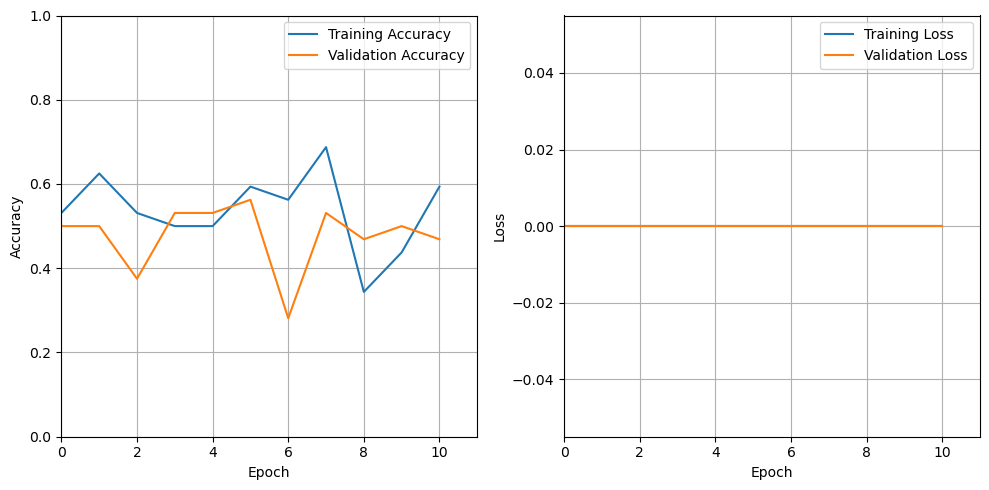

In [60]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(log.history['accuracy'], label='Training Accuracy')
plt.plot(log.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([0, len(log.history['accuracy'])])
plt.ylim([0, 1])
plt.legend()
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(log.history['loss'], label='Training Loss')
plt.plot(log.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xlim([0, len(log.history['loss'])])
# plt.ylim([0, 1])
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

# cnn.load_weights('best_model.h5')

In [62]:
# Evaluate the model on the test set
test_generator.reset()
predictions = cnn.predict(test_generator, 
                          steps=32, 
                          verbose=1)

y_pred = np.argmax(predictions, axis=1)
y_true = test_generator.classes

# print number of errors of total
print(np.sum(y_pred != y_true), 'errors of', len(y_true), 'total')

# print percentage of errors
print(np.sum(y_pred != y_true) / len(y_true) * 100, '% errors')

# print accuracy
print((len(y_true) - np.sum(y_pred != y_true)) / len(y_true) * 100, '% accuracy')

test_loss, test_accuracy = cnn.evaluate(test_generator, steps=len(test_generator))
print(f'Test Accuracy: {test_accuracy:.4f}')

# Confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true, y_pred)
print("Confusion matrix for the test data:")
print(cm)



32/32 [==============================] - 3s 82ms/step
1 errors of 500 total
0.2 % errors
99.8 % accuracy


C:\Users\ruben\AppData\Local\Temp\ipykernel_12932\2292765644.py:11: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print(np.sum(y_pred != y_true), 'errors of', len(y_true), 'total')
C:\Users\ruben\AppData\Local\Temp\ipykernel_12932\2292765644.py:14: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print(np.sum(y_pred != y_true) / len(y_true) * 100, '% errors')
C:\Users\ruben\AppData\Local\Temp\ipykernel_12932\2292765644.py:17: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  print((len(y_true) - np.sum(y_pred != y_true)) / len(y_true) * 100, '% accuracy')


ValueError: Found input variables with inconsistent numbers of samples: [500, 512]

In [ ]:
# cnn.load_weights('best_model.h5')
# h = log.history
# plt.plot(h["loss"], label='Training Loss')
# plt.plot(h["accuracy"], label='Training Accuracy')
# plt.plot(h["val_loss"], label='Validation Loss')
# plt.plot(h["val_accuracy"], label='Validation Accuracy')
# plt.legend()
# plt.xlabel('Epoch')
# plt.ylabel('Value')
# plt.title('Training and Validation Metrics')
# plt.show()

# # Evaluate the model on the test set
# test_generator.reset()
# predictions = cnn.predict(test_generator, 
#                           steps=32, 
#                           verbose=1)

# y_pred = np.argmax(predictions, axis=1)
# y_true = test_generator.classes

# # Total number of errors
# num_errors = np.sum(y_pred != y_true)
# print("Total number of errors:", num_errors)

# # Confusion matrix
# cm = confusion_matrix(y_true, y_pred)
# print("Confusion matrix for the test data:")
# print(cm)


In [ ]:
# Train the network for 25 epochs and show the results. 
# Also include the test data as the validation set during training. 
# Make sure to set the steps_per_epoch and the validation_steps so that each training epoch runs through the all the training and test images. Show the evolution of the accuracies and the losses during training and 
# print the number of errors and the confusion matrix for the test data.


# log = cnn.fit(trainGen,
#               epochs=25,
#               steps_per_epoch=32,
#               validation_steps=32,
#               validation_data=testGen)

# h = log.history
# plt.plot(h["loss"], label='Loss')
# plt.plot(h["accuracy"], label='Accuracy')
# plt.plot(h["val_loss"], label='Val Loss')
# plt.plot(h["val_accuracy"], label='Val Acurracy')
# plt.legend()
# plt.show()


#### Ver mais tarde

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Set the directory path
dir = './CatsDogsVerySmall/'

# Create the ImageDataGenerator for training and testing data
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255.0,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

test_datagen = ImageDataGenerator(rescale=1.0 / 255.0)

# Set the batch size
batch_size = 32

# Create the generators for training and testing data
train_generator = train_datagen.flow_from_directory(
    os.path.join(dir, 'train'),
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    os.path.join(dir, 'test'),
    target_size=(256, 256),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

# Define the CNN model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Set the number of training and validation steps per epoch
train_steps_per_epoch = train_generator.samples // batch_size
test_steps_per_epoch = test_generator.samples // batch_size

# Train the model for 25 epochs
history = model.fit(
    train_generator,
    steps_per_epoch=train_steps_per_epoch,
    epochs=25,
    validation_data=test_generator,
    validation_steps=test_steps_per_epoch
)

# Plot the accuracy and loss curves during training
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].plot(history.history['accuracy'], label='Training Accuracy')
axes[0].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[0].set_title('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('Accuracy')
axes[0].legend()

axes[1].plot(history.history['loss'], label='Training Loss')
axes[1].plot(history.history['val_loss'], label='Validation Loss')
axes[1].set_title('Loss')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Loss')
axes[1].legend()

plt.tight_layout()
plt.show()

# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, steps=test_steps_per_epoch, verbose=0)
print("Test Accuracy:", test_accuracy)

# Predict on the test set
test_generator.reset()
pred_probs = model.predict(test_generator, steps=test_steps_per_epoch, verbose=0)

# Convert the probabilities into binary predictions
preds = np.round(pred_probs, 0)

# Print the number of errors
num_errors = np.sum(preds != test_generator.classes)
print("Number of errors:", num_errors)

# Print the confusion matrix
cm = confusion_matrix(test_generator.classes, preds)
print("Confusion matrix for the test data:")
print(cm)

# Plot the confusion matrix
plt.imshow(cm, cmap=plt.cm.Blues)
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.xticks([], [])
plt.yticks([], [])
plt.title('Confusion matrix ')
plt.colorbar()
plt.show()
